* Họ tên: Huỳnh Thiện Tùng

* MSSV: 19522492

* Bài tập 5: Trực quan hóa Feature Map


In [1]:
import tensorflow as tf
from keras import Model
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
import numpy as np
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt

In [2]:
model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [3]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    
    filters, _ = layer.get_weights()
    print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [14]:
"""
@param show_fig is flag which decides to show on or off a figure
@param *args take the input as tuple of layers
@output: saved figures
"""


def runable(show_fig=False, *args):
    for ith_layer in args:
        _model = Model(inputs=model.inputs, outputs=model.layers[ith_layer].output)
        # Load the image with the required shape
        img = load_img('./test_image.jpg', target_size=(224, 224))

        # The image PIL object needs to be converted to a NumPy array of pixel data
        # and expanded from a 3D array to a 4D array with the dimensions of
        # [samples, rows, cols, channels], where we only have one sample.

        # Convert the image to an array
        img = img_to_array(img)

        # Expand dimensions so that it represents a single 'sample'
        img = np.expand_dims(img, axis=0)

        # Prepare the image (e.g. scale pixel values for the vgg)
        img = preprocess_input(img)
        
        feature_maps = _model.predict(img)        
        
        # Plot all 64 maps in an 8x8 squares
        square = 8
        ix = 1
        plt.rcParams["figure.figsize"] = (20,20)
        for _ in range(square):
            for _ in range(square):
                # Specify subplot and turn of axis
                ax = plt.subplot(square, square, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                # Plot filter channel in grayscale
                if show_fig:
                    plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
                ix += 1
        plt.savefig('feature_map_of_{}-th_layer.png'.format(ith_layer))
        plt.show()

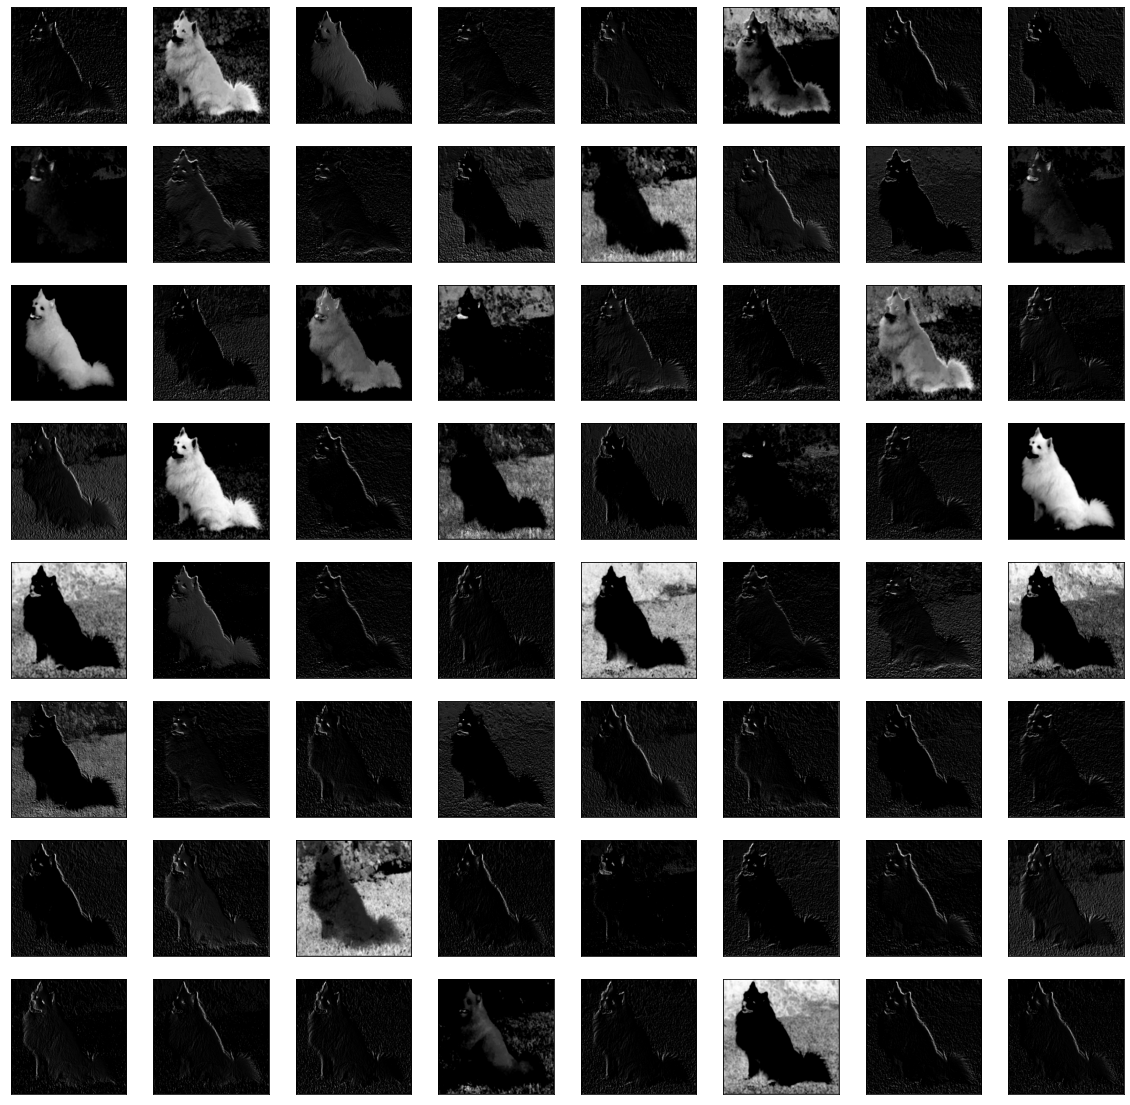

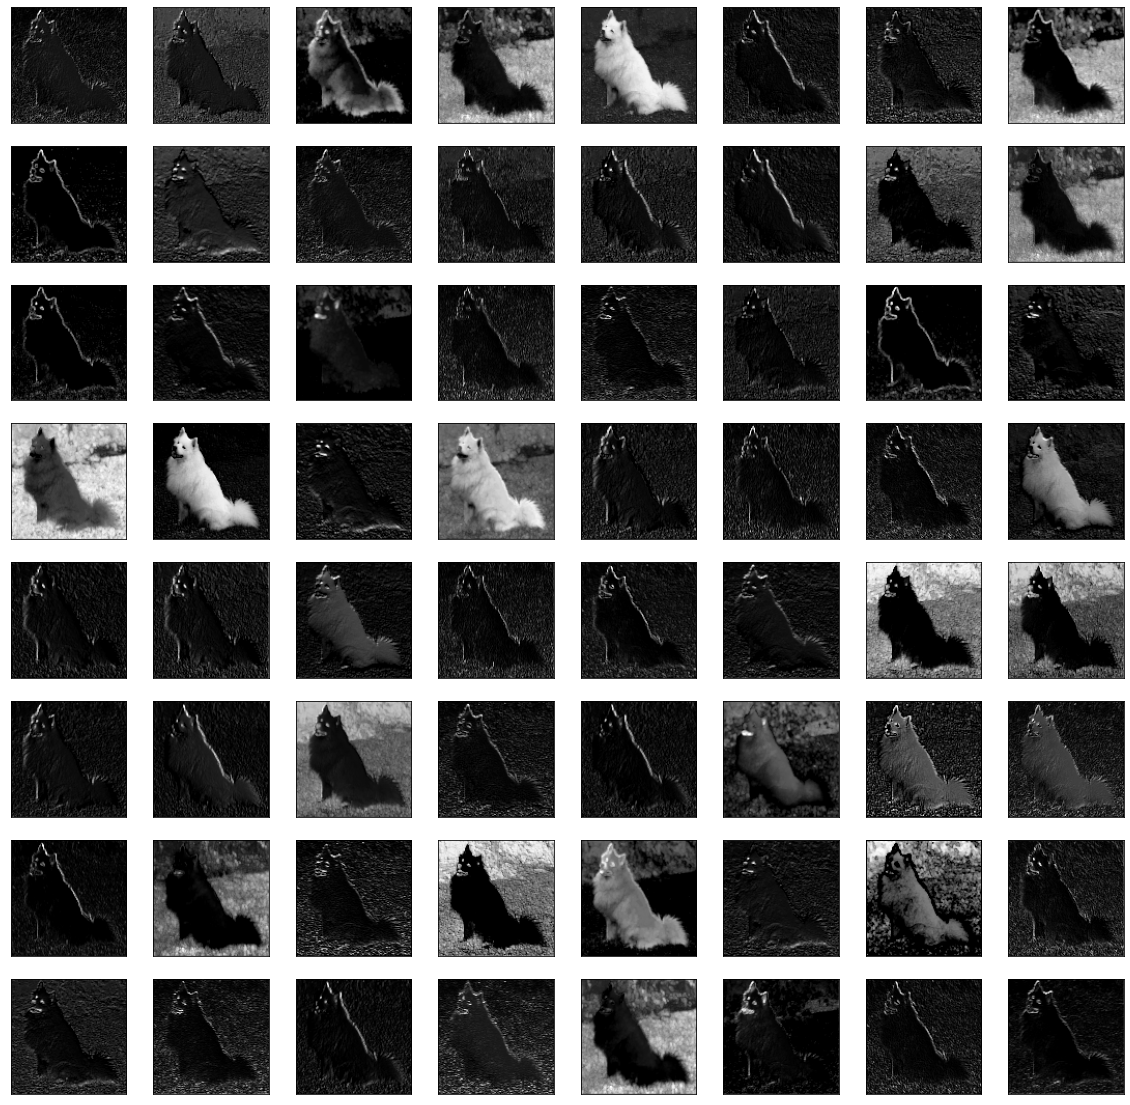

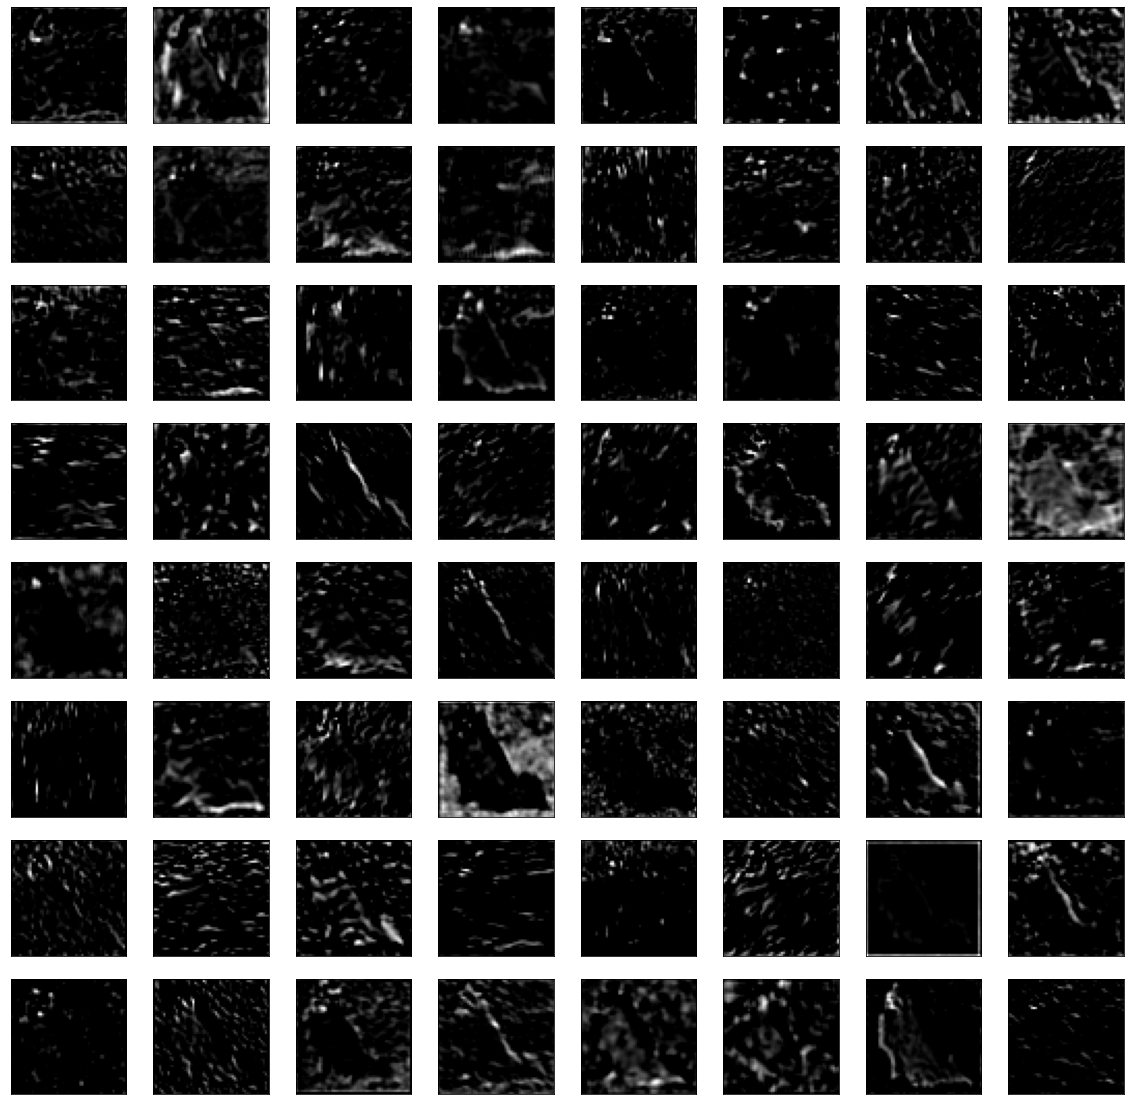

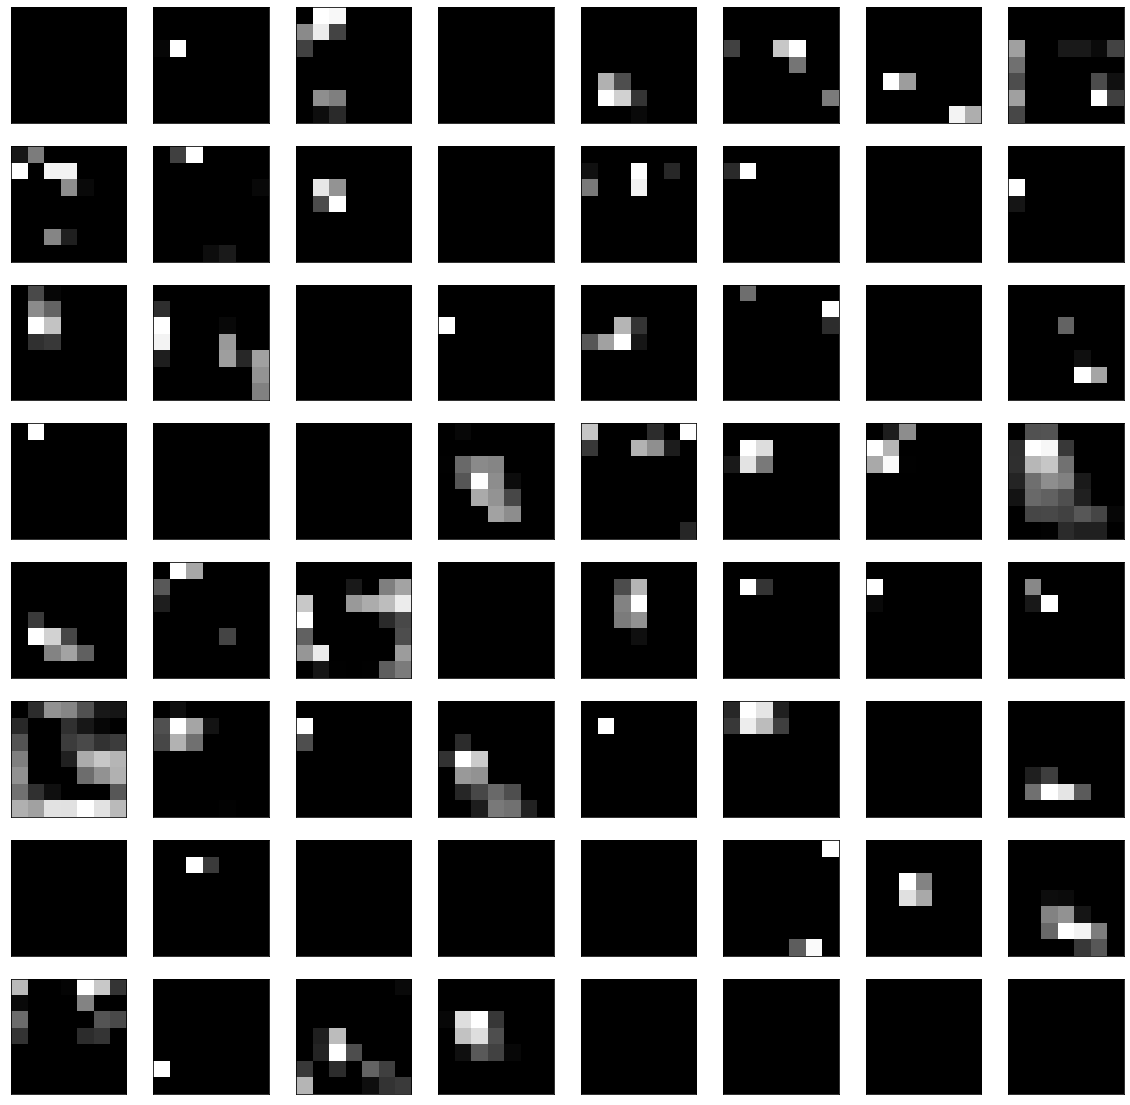

In [13]:
# define list layer to visualize
# first argument 

runable(1, 1, 3, 9, 18)